In [104]:
import os
import sys
import pandas as pd
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from utils.metrics import compute_metrics

In [2]:
d = {'forecast':[2.5, 0.0, 2, 8], 'actual': [3, -0.5, 2, 7]}
df_test = pd.DataFrame(d)

compute_metrics(df_test, ['rmse','mape','wmape','wbias','wuforec','woforec'])

{'rmse': 0.6123724356957945,
 'mape': 0.3273809523809524,
 'wmape': 0.16,
 'wbias': -0.08695652173913043,
 'wuforec': 0.04,
 'woforec': 0.12}

# Visualization

In [116]:
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from utils.constants import column_rename_extended

sns.set(rc={'figure.figsize':(10,10)})

In [106]:
# data reformat
tr = pd.read_csv(root_dir+'/data/stacked_X_tr.csv')

# location 1 - 37
m = dict(zip(tr['Location_ID'].unique(), np.arange(1,len(tr['Location_ID'].unique()) + 1)))
tr['loc'] = tr['Location_ID'].map(m)
tr = tr.drop(columns = ['Month','Week','Weekday', 'Season','Season_Num','Location_ID'])

y_tr = pd.read_csv(root_dir+'/data/y_train.csv')
tr['ph'] = y_tr['measurement']
tr = tr.rename(columns = column_rename_extended)
tr['date'] = pd.to_datetime(tr['date'])

In [127]:
tr

,max_conduct,max_ph,min_ph,min_conduct,mean_conduct,max_oxygen,mean_oxygen,min_oxygen,mean_temp,min_temp,max_temp,date,loc,ph
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,2016-01-28,1,0.648148
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,2016-01-28,2,0.648148
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,2016-01-28,3,0.648148
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,2016-01-28,4,0.638889
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,2016-01-28,5,0.648148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,0.005049,0.910256,0.004676,0.004883,0.888158,0.939024,0.719697,0.535433,0.553125,0.490385,0.584302,2017-03-25,33,0.824074
15647,0.002456,0.884615,0.002417,0.002422,0.644737,0.865854,0.651515,0.622047,0.556250,0.522436,0.584302,2017-03-25,34,0.666667
15648,0.003821,0.935897,0.003615,0.003750,0.559211,0.890244,0.636364,0.645669,0.571875,0.554487,0.561047,2017-03-25,35,0.685185
15649,0.001287,0.897436,0.001277,0.001289,0.631579,0.853659,0.712121,0.724409,0.468750,0.464744,0.462209,2017-03-25,36,0.657407


In [141]:
sub_loc = tr[tr['loc'].isin([1,2,3])]

In [142]:
# Create the 3D scatter plot using plotly
sub_3d = sub_loc[['loc','date','ph']]
fig = px.scatter_3d(sub_3d, x='loc', y='date', z='ph',
                    color='ph', width = 1000, height = 1000)

# Update the layout for better readability
fig.update_layout(scene=dict(xaxis_title='Location',
                             yaxis_title='Date',
                             zaxis_title='Ph'))

# Show the plot
fig.show()

<AxesSubplot:xlabel='date'>

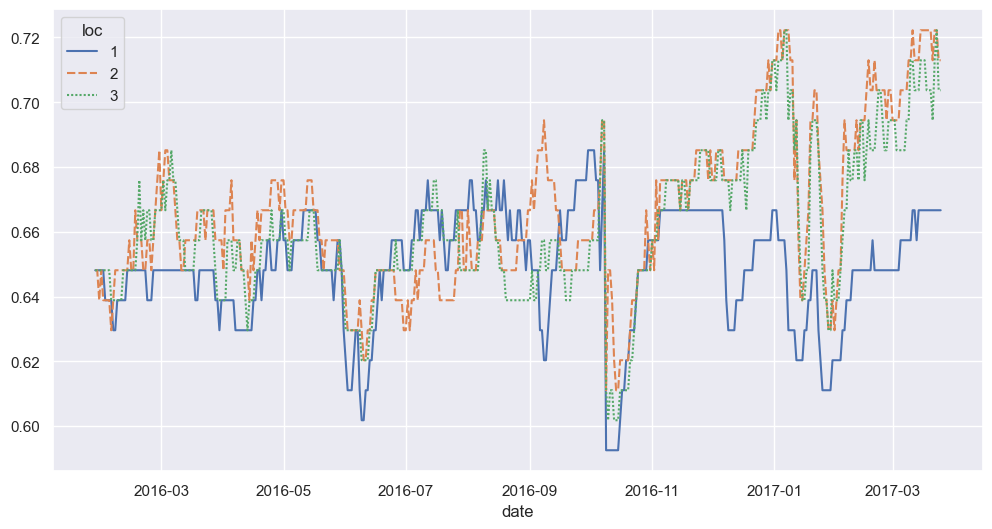

In [160]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = sub_loc.pivot('date','loc','ph'))

# Stationary Test

In [161]:
var = 'ph'
ts_loc_1 = sub_loc[sub_loc['loc']==1][['date',var]]

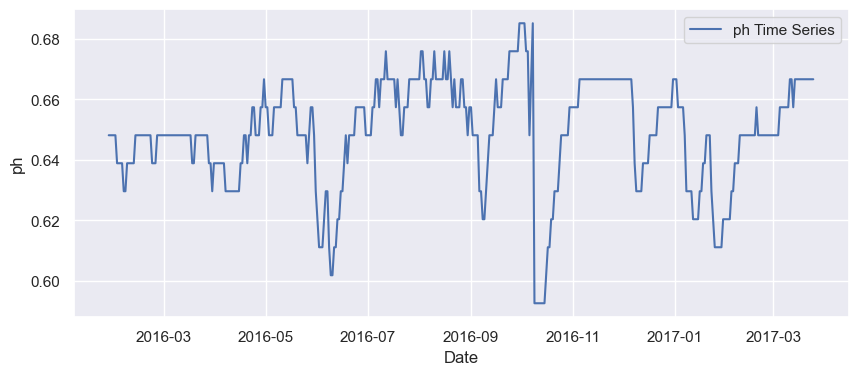

ADF Statistic: -4.619213110965353
p-value: 0.00011903686762098594
Critical Values:
  1%: -3.446129402876608
  5%: -2.8684960761128346
  10%: -2.570475362616382
Reject the null hypothesis: The time series is stationary.


In [162]:
from statsmodels.tsa.stattools import adfuller

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(ts_loc_1['date'], ts_loc_1[var], label= var+' Time Series')
plt.xlabel('Date')
plt.ylabel(var)
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(ts_loc_1[var])

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'  {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis: The time series is stationary.')
else:
    print('Fail to reject the null hypothesis: The time series is non-stationary.')
